In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [11]:
# Sales uploads
df1 = pd.read_csv(r"C:\Users\User\Desktop\saal\sales22-1.csv", parse_dates=['Дата'], na_values='-')
df2 = pd.read_csv(r"C:\Users\User\Desktop\saal\sales22-2.csv", parse_dates=['Дата'], na_values='-')
df3 = pd.read_csv(r"C:\Users\User\Desktop\saal\sales22-3.csv", parse_dates=['Дата'], na_values='-', )
df4 = pd.read_csv(r"C:\Users\User\Desktop\saal\sales23-1.csv", parse_dates=['Дата'], na_values='-', )
df5 = pd.read_csv(r"C:\Users\User\Desktop\saal\sales23-2.csv", parse_dates=['Дата'], na_values='-')
df6 = pd.read_csv(r"C:\Users\User\Desktop\saal\sales23-3.csv", parse_dates=['Дата'], na_values='-')
df7 = pd.read_csv(r"C:\Users\User\Desktop\saal\sales24-1.csv", parse_dates=['Дата'], na_values='-')
df8 = pd.read_csv(r"C:\Users\User\Desktop\saal\sales24-2.csv", parse_dates=['Дата'], na_values='-', )
df9 = pd.read_csv(r"C:\Users\User\Desktop\saal\sales24-3.csv", parse_dates=['Дата'], na_values='-', )
# Connect all to one DF
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], ignore_index=True) # for the future 2025 demand forecast
# df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True) # for testing
df.columns = df.columns.str.lower().str.replace(' ', '_')

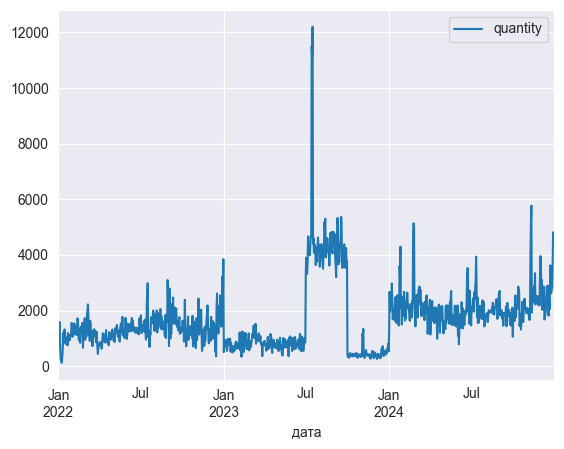

,дата,quantity
0,2022-01-01,680.134058
1,2022-01-02,1187.032331
2,2022-01-03,1588.150859
3,2022-01-04,1564.152677
4,2022-01-05,541.369085
...,...,...
1091,2024-12-27,3615.772629
1092,2024-12-28,4815.893587
1093,2024-12-29,4521.007450
1094,2024-12-30,4673.171468


In [12]:
#####  First check the daily demand of items

# since I found out a lot of NaN were detected, I used given price for the same item and apply it for others. Later, this might be useful, but not in this problem
df['price'] = df.groupby('item_id')['price'].transform('first')
df['дата'] = pd.to_datetime(df['дата'])
# other not given price just filled with median value
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df['price'] = imp.fit_transform(df['price'].values.reshape(-1, 1))[:, 0]
df = df.dropna(subset=['quantity', 'дата'])
df1 = df.groupby('дата')['quantity'].sum().reset_index()
# check the quantities for each day
df1.plot(x='дата', y='quantity')
plt.show()
df1

In [13]:
# Here I thought making graphs for each store could be useful, did not use it after.

df['наименование_магазина'].unique()

array(['Магазин Актау 17 микрорайон', 'Магазин Актау Байтерек',
       'Магазин Актау Жигер', 'Магазин Актобе', 'Магазин Актобе Мега',
       'Магазин Актобе Mall', 'Магазин Алматы Апорт - Молл',
       'Магазин Алматы Дом на Абая', 'Магазин Алматы Жандосова',
       'Магазин Алматы Март', 'Магазин Алматы Мега',
       'Магазин Алматы Мега Парк', 'Магазин Алматы Москва',
       'Магазин Алматы Нижний', 'Магазин Алматы Прайм-Плаза',
       'Магазин Алматы Рамстор', 'Магазин Алматы Форум',
       'Магазин Алматы Хай Тек', 'Магазин Алматы Mall',
       'Магазин Астана Абу-Даби Плаза', 'Магазин Астана Бахус',
       'Магазин Астана Керуен', 'Магазин Астана Магнум',
       'Магазин Астана Мега Silk Way', 'Магазин Астана Республика',
       'Магазин Атырау', 'Магазин Атырау Насиха', 'Магазин Бишкек Ларель',
       'Магазин Жезказган', 'Магазин Караганда',
       'Магазин Караганда 45 квартал', 'Магазин Костанай',
       'Магазин Костанай Март', 'Магазин Костанай Плаза',
       'Магазин Кызыл

In [33]:
df_grouped = df.groupby(['дата', 'наименование_магазина'])['price'].sum().reset_index()
stores = df_grouped['наименование_магазина'].unique()
# Graphing
for store in stores:
    store_data = df_grouped[df_grouped['наименование_магазина'] == store]
    plt.figure(figsize=(4, 2))
    plt.plot(store_data['дата'], store_data['price'], label=store)
    plt.title(f'Объем продаж для {store}')
    plt.xlabel('Дата')
    plt.ylabel('Общий объем продаж')
    plt.show()

KeyboardInterrupt: 

>expected=1869.1, predicted=1946.1
>expected=1625.4, predicted=2018.5
>expected=2484.9, predicted=1751.9
>expected=2543.4, predicted=1521.0
>expected=1763.5, predicted=2679.5
>expected=2191.9, predicted=1513.2
>expected=2074.6, predicted=2066.7
>expected=2070.4, predicted=2319.6
>expected=2133.4, predicted=1823.6
>expected=2858.7, predicted=1790.7
>expected=2761.5, predicted=2166.7
>expected=2689.7, predicted=2824.8
>expected=1442.9, predicted=2370.0
>expected=1658.9, predicted=2132.6
>expected=1874.8, predicted=1933.7
>expected=1310.9, predicted=1927.2
>expected=1560.4, predicted=1656.3
>expected=1987.3, predicted=1854.5
>expected=2313.8, predicted=1794.0
>expected=1861.6, predicted=1834.7
>expected=1583.9, predicted=1982.9
>expected=1928.9, predicted=1479.5
>expected=2178.3, predicted=1820.7
>expected=2423.4, predicted=2062.2
>expected=2133.0, predicted=2389.3
>expected=2111.3, predicted=1713.1
>expected=2105.9, predicted=1885.3
>expected=1904.5, predicted=1881.4
>expected=2093.2, pr

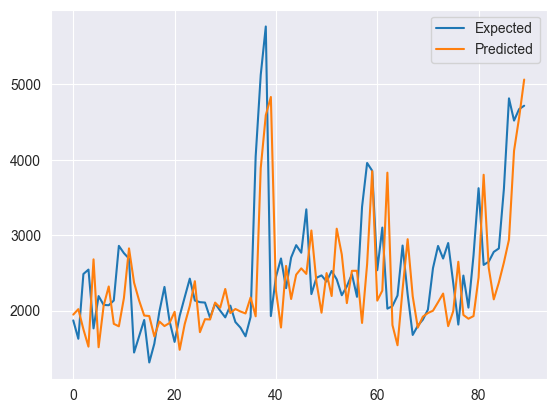

In [13]:
# Here comes the model

from numpy import asarray
from pandas import read_csv, DataFrame, concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

# Time Series converting to  supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    agg = concat(cols, axis=1)
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

# xgboost Model
def xgboost_forecast(train, testX):
    train = asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1200)
    model.fit(trainX, trainy)
    yhat = model.predict(testX.reshape(1, -1))  # Ensure testX is 2D
    return yhat[0]

# Walk-forward validation
def walk_forward_validation(data, n_test):
    predictions = list()
    # last n_test samples as test
    train, test = data[:-n_test], data[-n_test:]
    history = [x for x in train]
    for i in range(len(test)):
        testX, testy = test[i, :-1], test[i, -1]
        yhat = xgboost_forecast(history, testX)
        predictions.append(yhat)
        history.append(test[i])
        print(f'>expected={testy:.1f}, predicted={yhat:.1f}')
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions

# data
values = df1['quantity'].values.reshape(-1, 1)  # Ensure 2D input
data = series_to_supervised(values, n_in=6)

# Training, validating
mae, y, yhat = walk_forward_validation(data, 90)
print('MAE: %.3f' % mae)
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

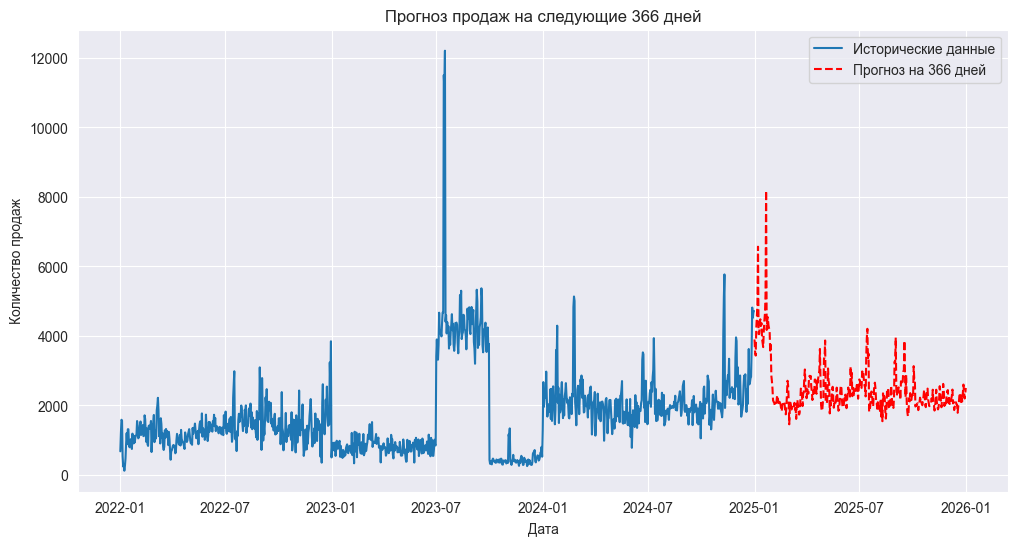

In [17]:
# Forecast for the future year

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# getting dates
last_date = pd.to_datetime(df1['дата'].iloc[-1])
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=366)

history = df1['quantity'].values[-6:].tolist()
future_predictions = []

for _ in range(366):
    testX = np.array(history[-6:]).reshape(1, -1)  # 2d array
    yhat = xgboost_forecast(data, testX)
    future_predictions.append(yhat)
    history.append(yhat)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df1['дата'], df1['quantity'], label='Исторические данные')
plt.plot(future_dates, future_predictions, label='Прогноз на 366 дней', linestyle='--', color='red')
plt.title('Прогноз продаж на следующие 366 дней')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.legend()
plt.grid(True)
# plt.savefig('forecast.png')  # saving figure
plt.show()

NameError: name 'd' is not defined

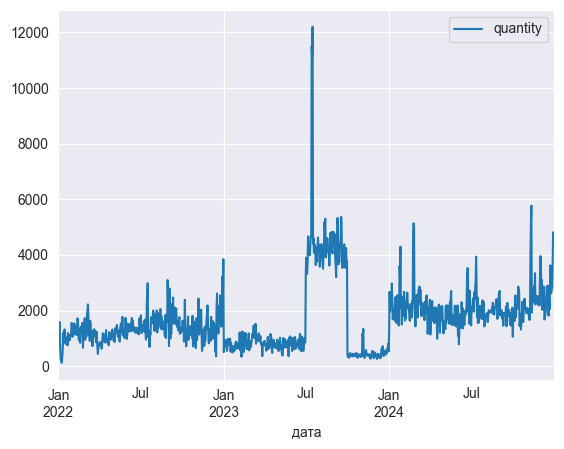

In [15]:
# getting all data to compare with the predictions  ### WHEN DF TAKES UP UNTIL DF6

used = pd.concat([df7, df8, df9], ignore_index=True)
dff = asd.groupby('Дата')['Quantity'].sum().reset_index()
dff.columns = dff.columns.str.lower().str.replace(' ', '_')
full_df = pd.concat([df1, dff], ignore_index=True)
full_df.plot(x='дата', y='quantity')

MAE: 787.42
MSE: 1042455.00


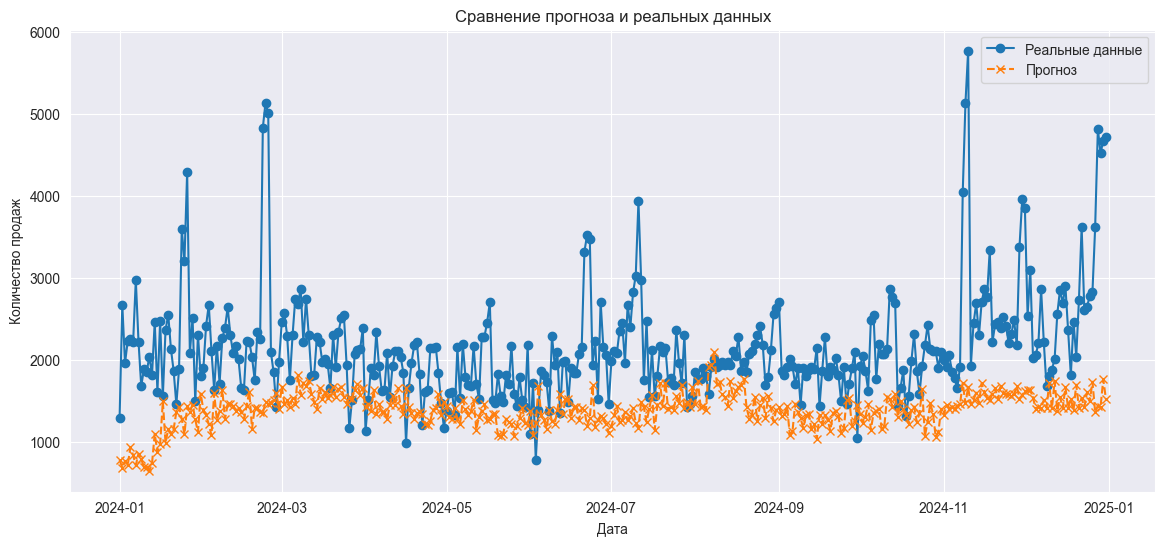

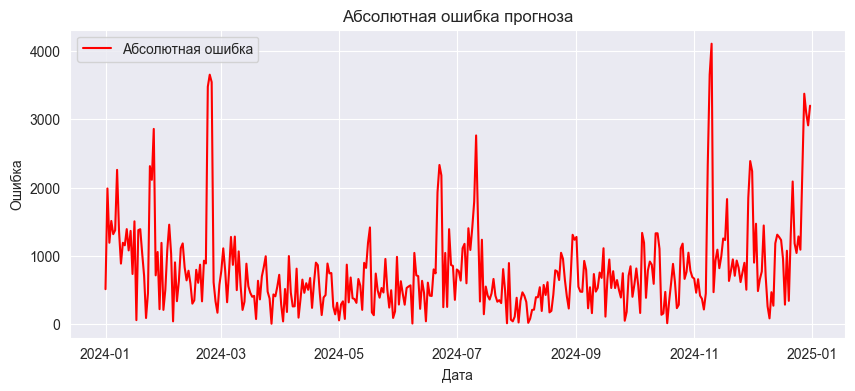

In [17]:
true_data = dff.copy()

# DF with predicted values
forecast_df = pd.DataFrame({
    'Дата': future_dates,
    'Прогнозируемые_продажи': future_predictions
})
# Connecting all to one df
comparison_df = forecast_df.set_index('Дата')
comparison_df['quantity'] = true_data['quantity'].values
comparison_df
# # metrics
mae = mean_absolute_error(comparison_df['quantity'], comparison_df['Прогнозируемые_продажи'])
rmse = mean_squared_error(comparison_df['quantity'], comparison_df['Прогнозируемые_продажи'])
print(f'MAE: {mae:.2f}')
print(f'MSE: {rmse:.2f}')

# visualizations
plt.figure(figsize=(14, 6))
plt.plot(comparison_df.index, comparison_df['quantity'], label='Реальные данные', marker='o')
plt.plot(comparison_df.index, comparison_df['Прогнозируемые_продажи'], label='Прогноз', linestyle='--', marker='x')
plt.title('Сравнение прогноза и реальных данных')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.legend()
plt.grid(True)
plt.show()

# error analysis
comparison_df['Ошибка'] = comparison_df['quantity'] - comparison_df['Прогнозируемые_продажи']
comparison_df['Абсолютная_ошибка'] = abs(comparison_df['Ошибка'])

plt.figure(figsize=(10, 4))
plt.plot(comparison_df.index, comparison_df['Абсолютная_ошибка'], label='Абсолютная ошибка', color='red')
plt.title('Абсолютная ошибка прогноза')
plt.xlabel('Дата')
plt.ylabel('Ошибка')
plt.legend()
plt.grid(True)
plt.show()